In [63]:
import pandas as pd
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from main import load_img
import main as m
import matplotlib.patches as mpatches
from pathlib import Path
from scipy import ndimage as ndi

In [10]:
good_condensates = m.load_img("data/massive_condensates.tif")
small_condensates = m.load_img("data/small_condensates.tif")
uniform_fluorescence = m.load_img("data/uniform_fluorescence.tif")
irregular_condensates = m.load_img("data/irregular_shape.tif")

images = [good_condensates, small_condensates, uniform_fluorescence, irregular_condensates]
image_labels = ["good_condensates", "small_condensates", "uniform_fluorescence", "irregular_condensates"]

<tifffile.TiffFile 'massive_condensates.tif'> OME series expected 1 frames, got 2
<tifffile.TiffFile 'massive_condensates.tif'> OME series cannot handle discontiguous storage ((1920, 2560, 3) != (3, 1920, 2560))
<tifffile.TiffFile 'small_condensates.tif'> OME series cannot handle discontiguous storage ((1920, 2560, 3) != (3, 1920, 2560))
<tifffile.TiffFile 'uniform_fluorescence.tif'> OME series cannot handle discontiguous storage ((1920, 2560, 3) != (3, 1920, 2560))
<tifffile.TiffFile 'irregular_shape.tif'> OME series expected 1 frames, got 2
<tifffile.TiffFile 'irregular_shape.tif'> OME series cannot handle discontiguous storage ((1920, 2560, 3) != (3, 1920, 2560))


In [11]:
def plot_images(images, image_labels):
    fig, ax = plt.subplots(1, len(images), figsize=(20, 20))
    for i, image in enumerate(images):
        ax[i].imshow(image, cmap="gray")
        ax[i].set_title(image_labels[i])
    plt.show()

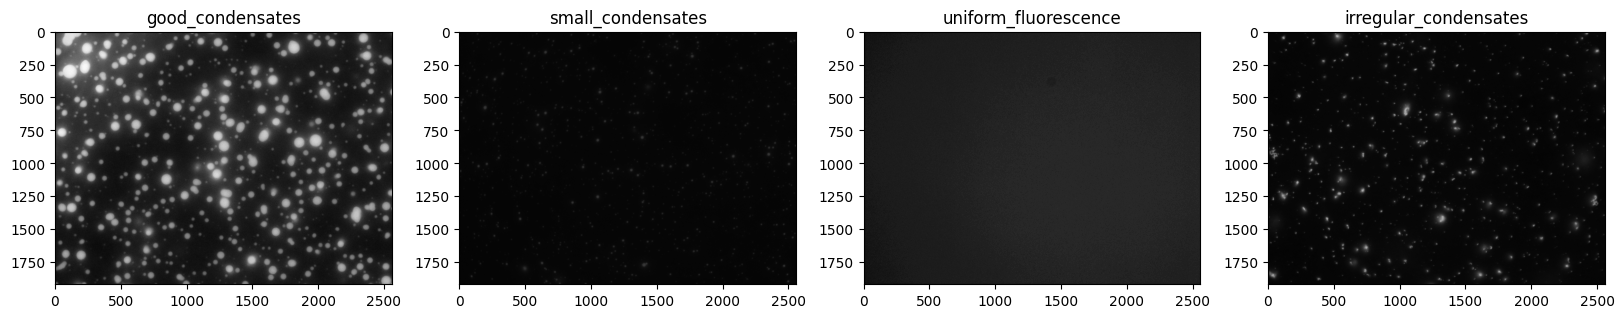

In [12]:
plot_images(images, image_labels)

In [15]:
mod = ski.morphology.closing(small_condensates, ski.morphology.disk(15))

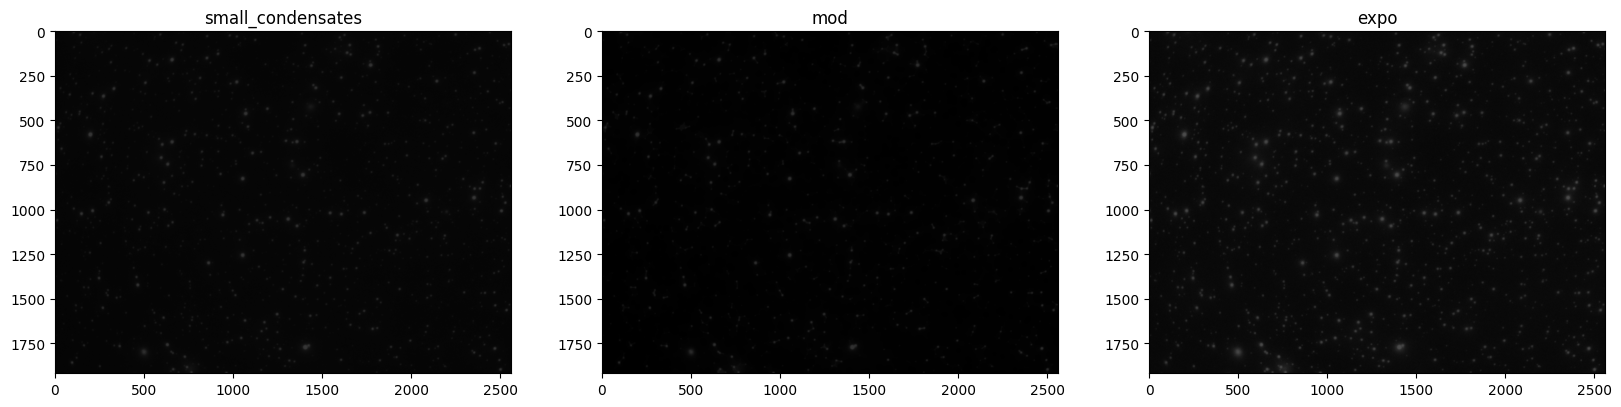

In [17]:
expo = ski.exposure.equalize_adapthist(small_condensates)

plot_images([small_condensates, mod, expo], ["small_condensates", "mod", "expo"])

In [52]:
def proposed_pre_processing(image):
    # median = ski.filters.median(image, ski.morphology.disk(3))
    # unsharp = ski.filters.unsharp_mask(image, radius=3, amount=1)

    restored = ski.restoration.richardson_lucy(image, ski.morphology.disk(3), num_iter=30)

    closing = ski.morphology.dilation(restored, ski.morphology.disk(3))
    exposure_fix = ski.exposure.equalize_adapthist(closing)

    return exposure_fix

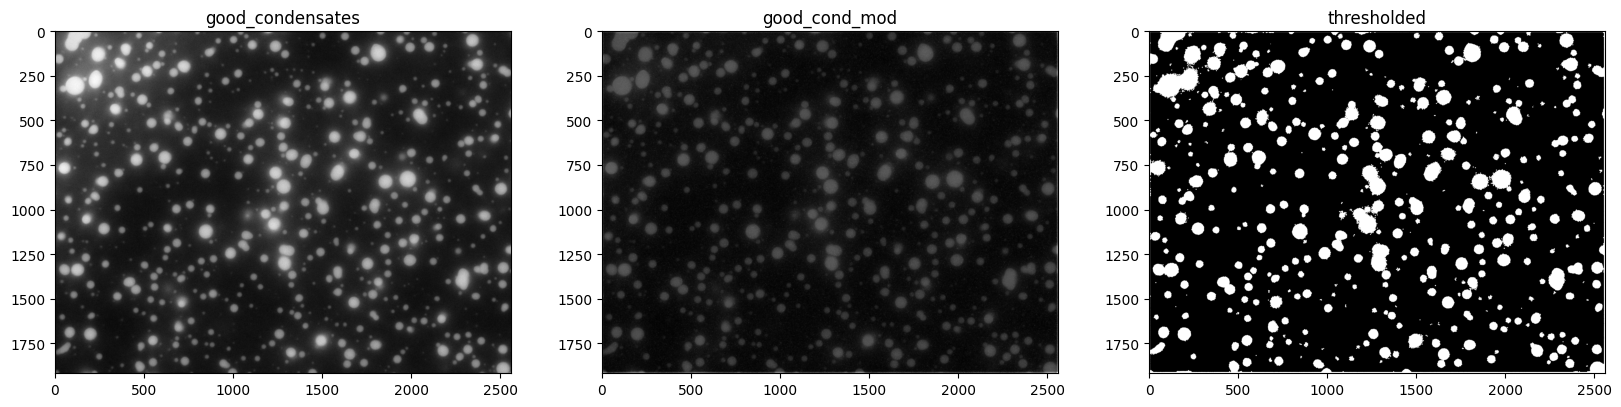

In [56]:
good_cond_mod = proposed_pre_processing(good_condensates)
thresholded = good_cond_mod > ski.filters.threshold_otsu(good_cond_mod)
plot_images([good_condensates, good_cond_mod, thresholded], ["good_condensates", "good_cond_mod", "thresholded"])

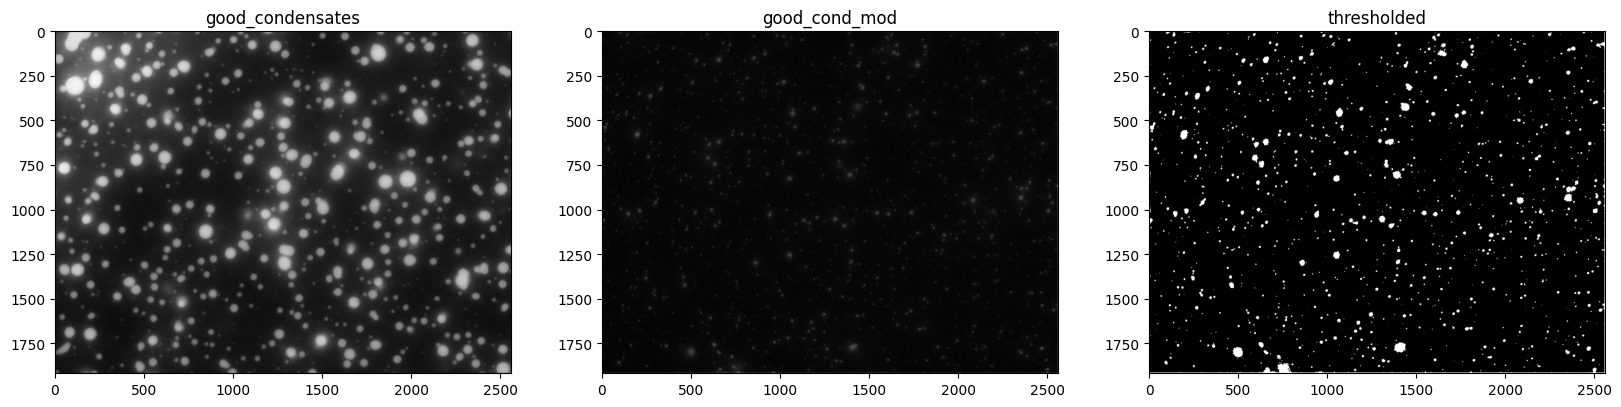

In [51]:
good_cond_mod = proposed_pre_processing(small_condensates)
thresholded = good_cond_mod > ski.filters.threshold_isodata(good_cond_mod)
plot_images([good_condensates, good_cond_mod, thresholded], ["good_condensates", "good_cond_mod", "thresholded"])

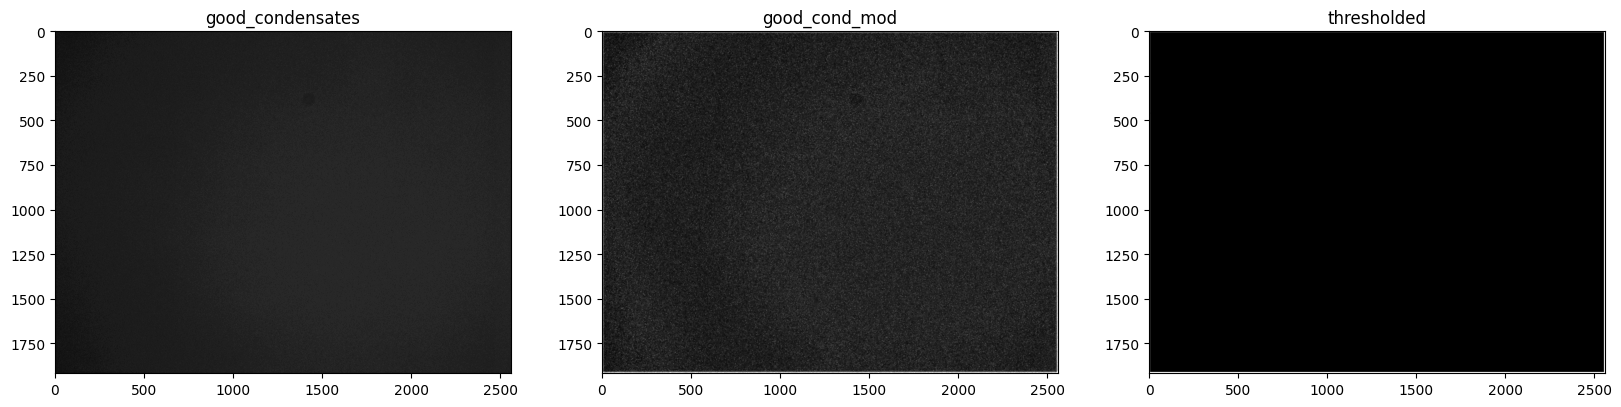

In [55]:
good_cond_mod = proposed_pre_processing(uniform_fluorescence)
thresholded = good_cond_mod > ski.filters.threshold_isodata(good_cond_mod)
plot_images([uniform_fluorescence, good_cond_mod, thresholded], ["good_condensates", "good_cond_mod", "thresholded"])

In [44]:
np.mean(good_condensates)

0.05256092690501493

In [45]:
np.mean(irregular_condensates)

0.04878583290768293

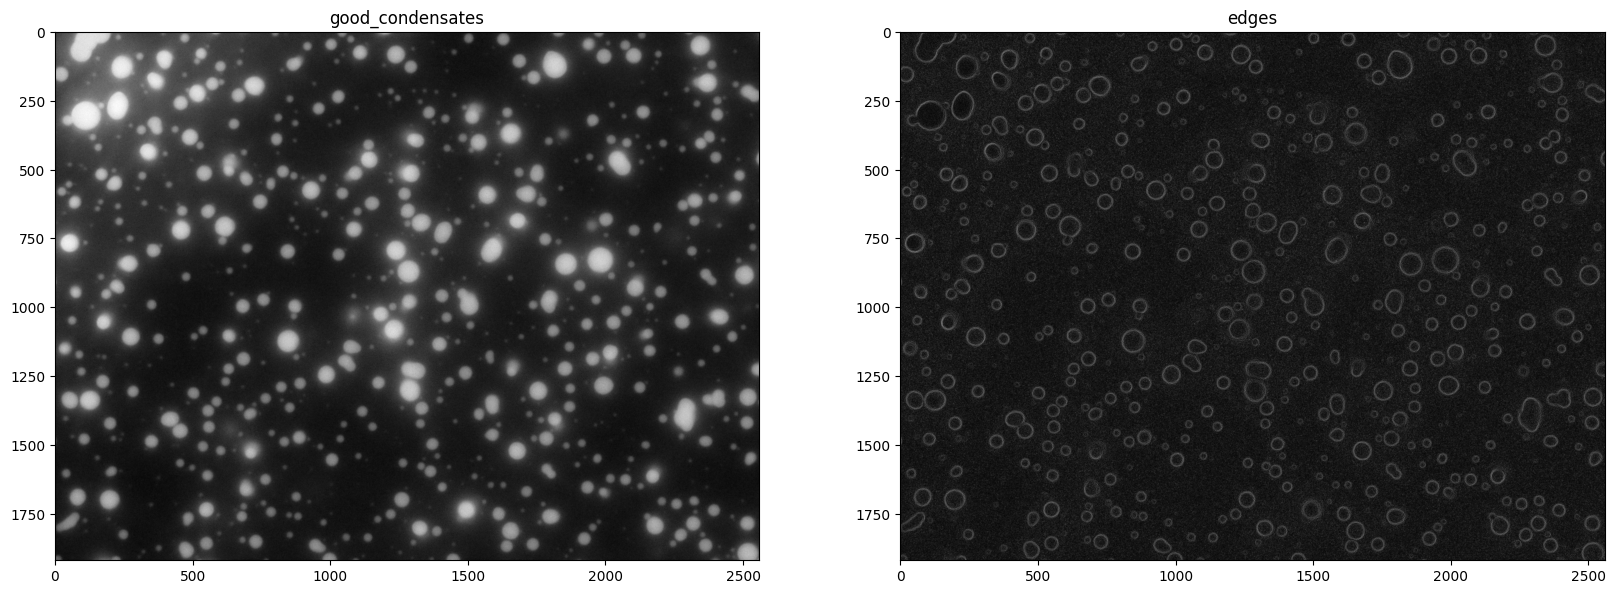

In [57]:
edges = ski.filters.sobel(good_condensates)
plot_images([good_condensates, edges], ["good_condensates", "edges"])

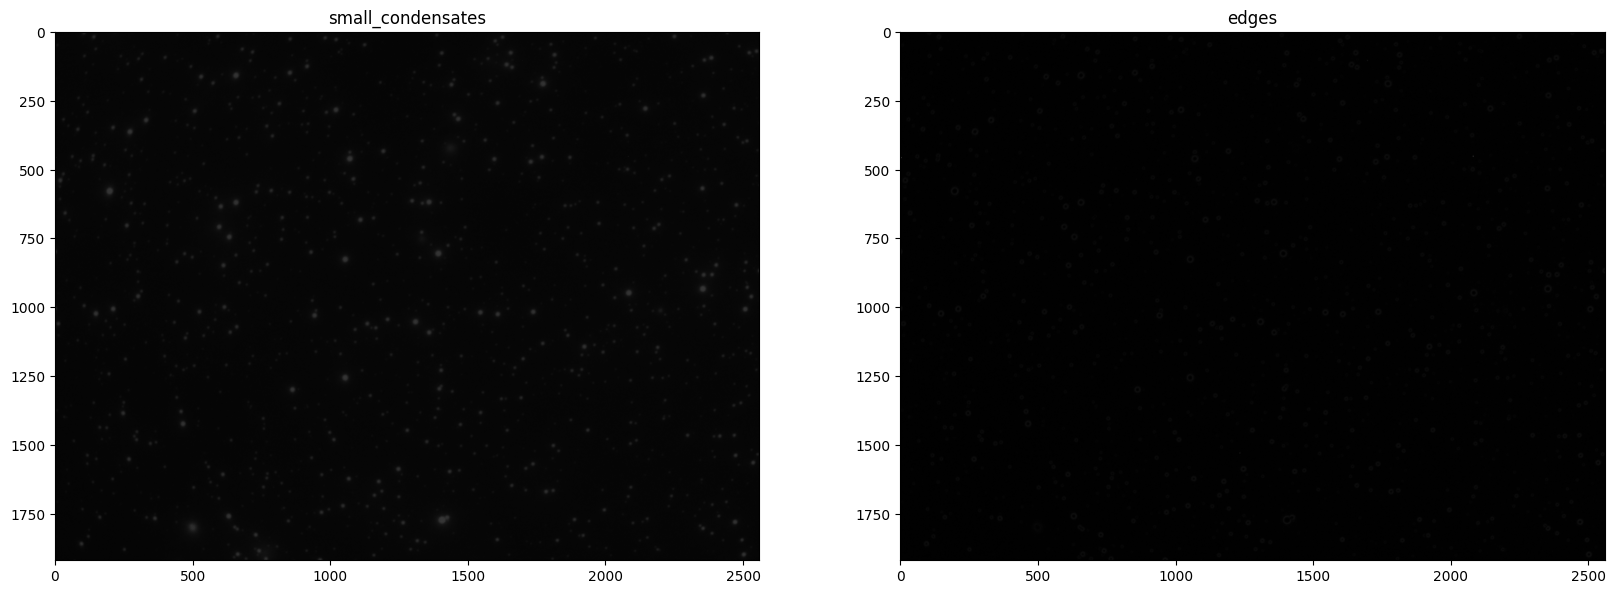

In [58]:
edges = ski.filters.sobel(small_condensates)
plot_images([small_condensates, edges], ["small_condensates", "edges"])

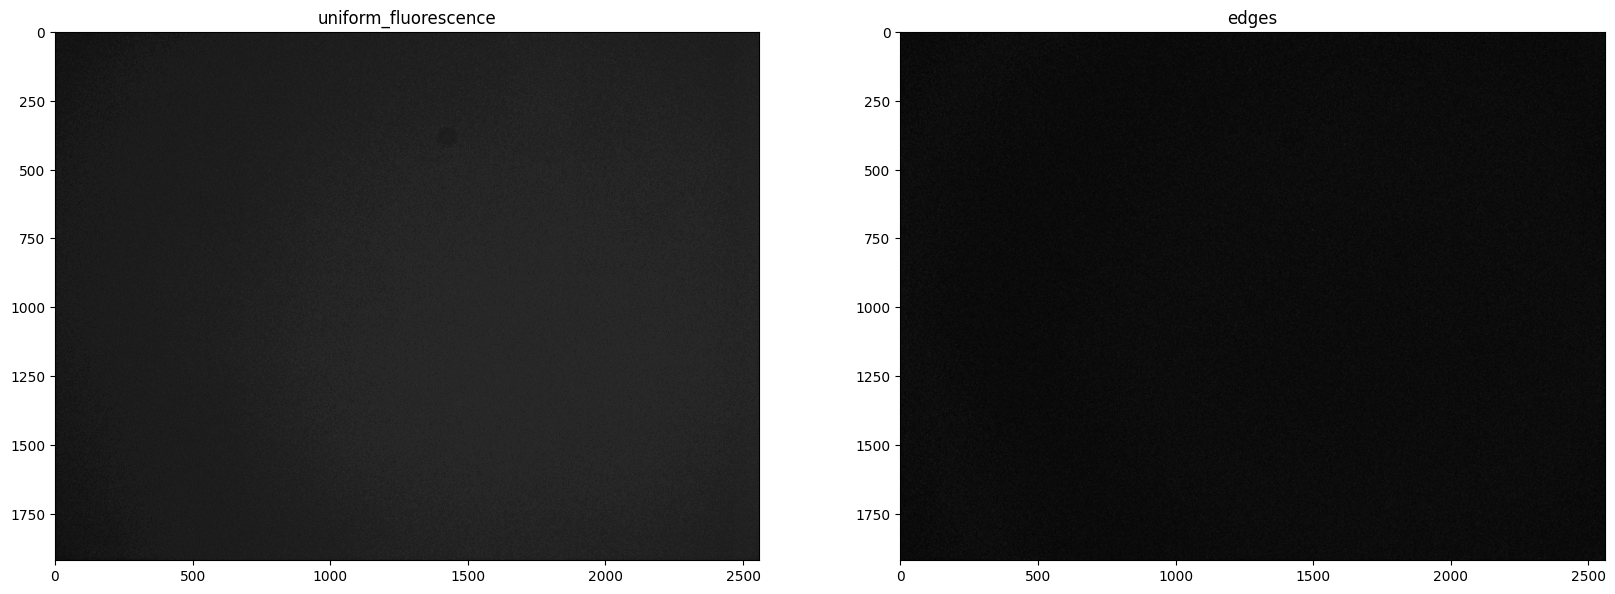

In [59]:
edges = ski.filters.sobel(uniform_fluorescence)
plot_images([uniform_fluorescence, edges], ["uniform_fluorescence", "edges"])

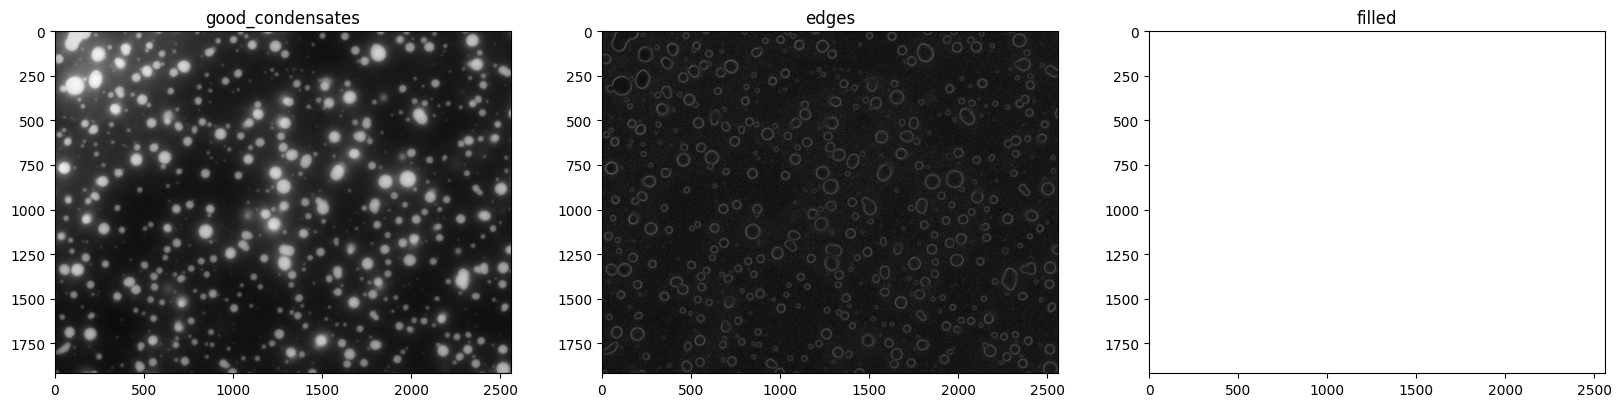

In [65]:
edges = ski.filters.sobel(good_condensates)

filled = ndi.binary_fill_holes(edges)

plot_images([good_condensates, edges, filled], ["good_condensates", "edges", "filled"])


In [67]:
print(np.std(uniform_fluorescence) / np.mean(uniform_fluorescence))
print(np.std(good_condensates) / np.mean(good_condensates))
print(np.std(small_condensates) / np.mean(small_condensates))
print(np.std(irregular_condensates) / np.mean(irregular_condensates))

0.06633369943721007
0.5383981915435874
0.41804175611308536
0.9743742240447547


In [69]:
a = Path("a/1.2")